In [179]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
# 시각화를 위한 폰트 설정
import os
if os.name=="posix":
    sns.set(font="AppleGothic")
elif os.name=="nt":
    sns.set(font="Malgun Gothic")

In [8]:
# 글자를 선명하게
%config lnlineBackend.figure_format='retina'

In [129]:
# csv 파일을 pandas로 로드
df_raw=pd.read_csv("국가_대륙_별_상품군별_온라인쇼핑_해외직접판매액_20210202120542.csv",encoding="cp949")
df_raw.shape

(450, 30)

In [130]:
# 국가별 빈도수 ( count(*) group by 국가(대륙)별 )
df_raw["국가(대륙)별"].value_counts()

일본            45
중남미           45
중동            45
유럽연합(EU)      45
미국            45
기타            45
중국            45
아세안(ASEAN)    45
대양주           45
합계            45
Name: 국가(대륙)별, dtype: int64

In [131]:
# 데이터의 컬럼 확인
df_raw.columns

Index(['국가(대륙)별', '상품군별', '판매유형별', '2014 1/4', '2014 2/4', '2014 3/4',
       '2014 4/4', '2015 1/4', '2015 2/4', '2015 3/4', '2015 4/4', '2016 1/4',
       '2016 2/4', '2016 3/4', '2016 4/4', '2017 1/4', '2017 2/4', '2017 3/4',
       '2017 4/4', '2018 1/4', '2018 2/4', '2018 3/4', '2018 4/4', '2019 1/4',
       '2019 2/4', '2019 3/4', '2019 4/4', '2020 1/4', '2020 2/4',
       '2020 3/4 p)'],
      dtype='object')

In [132]:
# 데이터의 행 확인
df_raw.values

array([['합계', '합계', '계', ..., 1525487, 1277716, 1615969],
       ['합계', '합계', '면세점', ..., 1297490, 1051987, 1421509],
       ['합계', '합계', '면세점 이외', ..., 227997, 225729, 194460],
       ...,
       ['기타', '기 타', '계', ..., 939, 710, 761],
       ['기타', '기 타', '면세점', ..., 0, 0, 0],
       ['기타', '기 타', '면세점 이외', ..., 939, 710, 761]], dtype=object)

In [133]:
df_raw.head()

,국가(대륙)별,상품군별,판매유형별,2014 1/4,2014 2/4,2014 3/4,2014 4/4,2015 1/4,2015 2/4,2015 3/4,...,2018 2/4,2018 3/4,2018 4/4,2019 1/4,2019 2/4,2019 3/4,2019 4/4,2020 1/4,2020 2/4,2020 3/4 p)
0,합계,합계,계,148272,153641,163999,213216,269101,271784,268421,...,897205,921586,974060,1250236,1344404,1525396,1879499,1525487,1277716,1615969
1,합계,합계,면세점,-,-,-,-,-,-,-,...,725319,761836,770656,1070693,1157158,1336372,1655635,1297490,1051987,1421509
2,합계,합계,면세점 이외,-,-,-,-,-,-,-,...,171886,159750,203404,179543,187246,189024,223864,227997,225729,194460
3,합계,컴퓨터 및 주변기기,계,4915,4052,3912,3529,2903,2697,3804,...,3854,4320,4511,3702,4038,3670,3826,4142,3812,7777
4,합계,컴퓨터 및 주변기기,면세점,-,-,-,-,-,-,-,...,6,1,215,2,0,1,70,113,0,3497


In [134]:
# tidy-data로 변환
# 컬럼에 있던 데이터를 행으로 위치
df=df_raw.melt(id_vars=["국가(대륙)별","상품군별","판매유형별"],var_name="기간",value_name="백만원")
df

,국가(대륙)별,상품군별,판매유형별,기간,백만원
0,합계,합계,계,2014 1/4,148272
1,합계,합계,면세점,2014 1/4,-
2,합계,합계,면세점 이외,2014 1/4,-
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-
...,...,...,...,...,...
12145,기타,생활용품 및 자동차용품,면세점,2020 3/4 p),0
12146,기타,생활용품 및 자동차용품,면세점 이외,2020 3/4 p),353
12147,기타,기 타,계,2020 3/4 p),761
12148,기타,기 타,면세점,2020 3/4 p),0


In [135]:
df["기간"]

0           2014 1/4
1           2014 1/4
2           2014 1/4
3           2014 1/4
4           2014 1/4
            ...     
12145    2020 3/4 p)
12146    2020 3/4 p)
12147    2020 3/4 p)
12148    2020 3/4 p)
12149    2020 3/4 p)
Name: 기간, Length: 12150, dtype: object

In [136]:
# 띄어쓰기를 기준으로 나눈 첫번째 (연도) 컬럼 추가
df["연도"]=df["기간"].map(lambda x:int(x.split()[0]))
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도
0,합계,합계,계,2014 1/4,148272,2014
1,합계,합계,면세점,2014 1/4,-,2014
2,합계,합계,면세점 이외,2014 1/4,-,2014
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915,2014
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-,2014


In [137]:
df=df[df['연도']>=2018]
df

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도
7200,합계,합계,계,2018 1/4,833672,2018
7201,합계,합계,면세점,2018 1/4,665613,2018
7202,합계,합계,면세점 이외,2018 1/4,168059,2018
7203,합계,컴퓨터 및 주변기기,계,2018 1/4,5236,2018
7204,합계,컴퓨터 및 주변기기,면세점,2018 1/4,2,2018
...,...,...,...,...,...,...
12145,기타,생활용품 및 자동차용품,면세점,2020 3/4 p),0,2020
12146,기타,생활용품 및 자동차용품,면세점 이외,2020 3/4 p),353,2020
12147,기타,기 타,계,2020 3/4 p),761,2020
12148,기타,기 타,면세점,2020 3/4 p),0,2020


In [138]:
df["백만원"]

7200     833672
7201     665613
7202     168059
7203       5236
7204          2
          ...  
12145         0
12146       353
12147       761
12148         0
12149       761
Name: 백만원, Length: 4950, dtype: object

In [143]:
# 결측치를 나타내는 문자 (0.0) 를 결측치로 변경하고 float으로 변경 
df["백만원"]=df["백만원"].replace(0.0,np.nan).astype(float)
df["백만원"]

<ipython-input-143-ae1f6a83c030>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["백만원"]=df["백만원"].replace(0.0,np.nan).astype(float)


7200     833672.0
7201     665613.0
7202     168059.0
7203       5236.0
7204          2.0
           ...   
12145         NaN
12146       353.0
12147       761.0
12148         NaN
12149       761.0
Name: 백만원, Length: 4950, dtype: float64

In [141]:
df.isnull().sum()

국가(대륙)별       0
상품군별          0
판매유형별         0
기간            0
백만원        1247
연도            0
dtype: int64

In [145]:
df2=df[ (df["국가(대륙)별"]=="합계") & (df["상품군별"]=="합계") & (df["판매유형별"]=="계")].copy()
df2.isnull().sum()
df2

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도
7200,합계,합계,계,2018 1/4,833672.0,2018
7650,합계,합계,계,2018 2/4,897205.0,2018
8100,합계,합계,계,2018 3/4,921586.0,2018
8550,합계,합계,계,2018 4/4,974060.0,2018
9000,합계,합계,계,2019 1/4,1250236.0,2019
9450,합계,합계,계,2019 2/4,1344404.0,2019
9900,합계,합계,계,2019 3/4,1525396.0,2019
10350,합계,합계,계,2019 4/4,1879499.0,2019
10800,합계,합계,계,2020 1/4,1525487.0,2020
11250,합계,합계,계,2020 2/4,1277716.0,2020


In [184]:
df_total=df[df["판매유형별"]=="계"].copy()
df_total

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도
7200,합계,합계,계,2018 1/4,833672.0,2018
7203,합계,컴퓨터 및 주변기기,계,2018 1/4,5236.0,2018
7206,합계,가전·전자·통신기기,계,2018 1/4,25635.0,2018
7209,합계,소프트웨어,계,2018 1/4,244.0,2018
7212,합계,서 적,계,2018 1/4,6193.0,2018
...,...,...,...,...,...,...
12135,기타,아동·유아용품,계,2020 3/4 p),624.0,2020
12138,기타,음·식료품,계,2020 3/4 p),49.0,2020
12141,기타,농축수산물,계,2020 3/4 p),1.0,2020
12144,기타,생활용품 및 자동차용품,계,2020 3/4 p),353.0,2020


(array([2017.75, 2018.  , 2018.25, 2018.5 , 2018.75, 2019.  , 2019.25,
        2019.5 , 2019.75, 2020.  , 2020.25]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

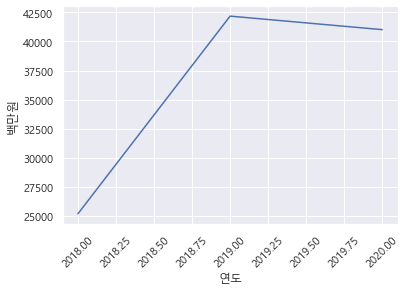

In [187]:
# 연도, 판매액 lineplot 그리기
sns.lineplot(data=df_total,x="연도",y="백만원",ci=None).set_title("해외 온라인 판매 동향")
plt.xticks(rotation=45)

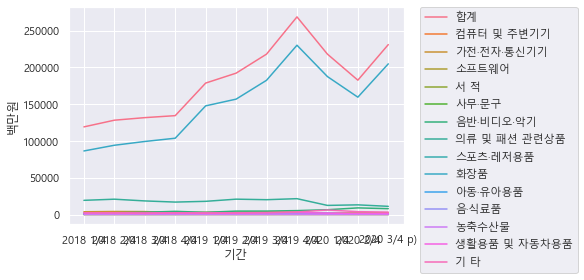

In [194]:
sns.lineplot(data=df,x="기간",y="백만원",hue="상품군별",ci=None)
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)
#plt.xticks(rotation=45)

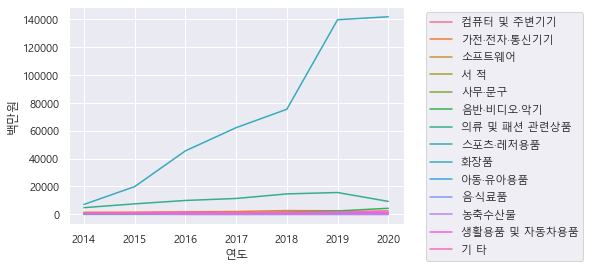